<a href="https://colab.research.google.com/github/uday-routhu/week3/blob/master/Belt_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belt Exam 1

  - Udaykumar Routhu

Requirements:

Your task is to clean and explore a dataset for HR executives that describes trends in their employee data related to attrition. A data dictionary can be found at the bottom of this page.



1) The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

  > Identify and address any duplicate valuesEnsure all columns match the data types listed in the data dictionary.
  > Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
  > Identify and address any missing values in this dataset.
  > Fill in missing values with a placeholder appropriate for the data type.
  > Identify and address any inappropriate or unusual data points (example: age cannot be 325)

2) The next step is to complete an exploration based on the data using Python. This should include:

Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

#start the exam

In [120]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [121]:
#mount the Drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [122]:
#create fname path
fname="/content/data/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/Mod_employee_attrition.csv"

In [123]:
#loading into data frame
df = pd.read_csv(fname)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


# Identify and address any duplicate values

In [124]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows_all=df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows_all.sum()


5

- Looks like there is 5 duplicated rows are avilable

In [125]:
# Drop the duplicated records
df.drop_duplicates(inplace = True)

In [126]:
#checking duplicates exists or not
df.duplicated().sum()

0

- There is no duplicates are available

# Ensure all columns match the data types listed in the data dictionary.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    588 non-null    object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

There are 2 columns that need to be converted to int rather object type


1. HourlyRate
2. Years At Company

In [128]:
# Converting HourlyRate Company to Int
#df['HourlyRate'] = df['HourlyRate'].astype('int')

Hmm

. HoutlyRate Contains non numeric values so we cannot convert them directly on to int. so we need to identify and handle those values before converting the column to an integer data type.

.Replace non-numeric values with NaN , then replace with Nan with Zero , then convert on to int.

In [129]:
df['HourlyRate'] = pd.to_numeric(df['HourlyRate'], errors='coerce')
df['HourlyRate'] = df['HourlyRate'].astype(float).fillna(0).astype(int)

In [130]:
#checking data type converted perfectly or not
df['HourlyRate'].dtype

dtype('int64')

In [131]:
# Converting Hourly Rate and Years At Company to Int
#df['YearsAtCompany'] = df['YearsAtCompany'].astype('int')

Hmm

. YearsAtCompany Contains non numeric values so we cannot convert them directly on to int. so we need to identify and handle those values before converting the column to an integer data type.

.Replace non-numeric values with NaN , then replace with Nan with Zero , then convert on to int.

In [132]:
df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'], errors='coerce')
df['YearsAtCompany'] = df['YearsAtCompany'].astype(float).fillna(0).astype(int)

In [133]:
df['YearsAtCompany'].dtype

dtype('int64')

#Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)

address any inconsistencies in categorical values (example: cat, Cat, cats)

In [134]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [135]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64



- BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



- Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



- EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



- Gender:
NaN       882
Female    588
Name: Gender, dtype: int64



- JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64



- MaritalStatus:
Married     673
Single      470
Di

- Looks like there is no inconsistencies in categorical values in above data frame

# Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.

checking for missing values

In [136]:
df.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
DailyRate                     0
WeeklyRate                    0
YearlyRate                    0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [137]:
#Identifying % of missing data
df.isna().sum() / len(df) * 100

Age                          0.0
Attrition                    0.0
BusinessTravel               0.0
Department                   0.0
DistanceFromHome             0.0
Education                    0.0
EducationField               0.0
EmployeeCount                0.0
EmployeeNumber               0.0
EnvironmentSatisfaction      0.0
Gender                      60.0
HourlyRate                   0.0
JobInvolvement               0.0
JobLevel                     0.0
JobRole                      0.0
JobSatisfaction              0.0
MaritalStatus                0.0
DailyRate                    0.0
WeeklyRate                   0.0
YearlyRate                   0.0
NumCompaniesWorked           0.0
Over18                       0.0
OverTime                     0.0
PercentSalaryHike            0.0
PerformanceRating            0.0
RelationshipSatisfaction     0.0
StandardHours                0.0
StockOptionLevel             0.0
TotalWorkingYears            0.0
TrainingTimesLastYear        0.0
WorkLifeBa

Missing Values:

There are 882 missing values in the Gender column. (60.00%)
In order to make informed decisions about how to handle missing data, we will do some additional EDA.

In [138]:
obj_columns = df.select_dtypes('object').columns

In [139]:
df[obj_columns] = df[obj_columns].fillna('Missing')

In [140]:
#Confirm that there are no missing values after addressing them.
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Identify and address any inappropriate or unusual data points (example: age cannot be 325)

In [141]:
df.describe().round(2)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,37.28,9.19,2.91,1.0,1024.87,2.72,65.83,2.73,2.06,2.73,...,2.71,80.0,0.79,11.28,2.80,2.76,7.00,4.23,2.19,4.12
std,16.80,8.11,1.02,0.0,602.02,1.09,20.39,0.71,1.11,1.10,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,1.00,1.00,1.0,1.00,1.00,0.00,1.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,2.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,3.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,14.00,4.00,1.0,1555.75,4.00,83.00,3.00,3.00,4.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,578.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,4.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [142]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,37.277551,9.192517,2.912925,1.0,1024.865306,2.721769,65.827211,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.79932,2.761224,7.004762,4.229252,2.187755,4.123129
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,578.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.00000,4.000000,40.000000,18.000000,15.000000,17.000000





> . Looks like there is an extreme value for the Age maximum. It showing a value for the max of 578.000000 This could be a mistake because max age for human being won't be that higher. We will go ahead and drop this value.



In [143]:
over_age = df['Age'] == 578.000000

df[over_age]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
99,578,No,Travel_Rarely,Sales,10,4,Medical,1,131,4,...,3,80,0,38,1,2,37,10,1,8


In [144]:
df.drop(index=99, inplace = True)

# Section2 The next step is to complete an exploration based on the data using Python. This should include:



> Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.

In [145]:
#First get the cat columns
cat_cols = df.select_dtypes('number').columns
cat_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'DailyRate',
       'WeeklyRate', 'YearlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [146]:
df[cat_cols].nunique()

Age                           43
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1469
EnvironmentSatisfaction        4
HourlyRate                    72
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
DailyRate                     71
WeeklyRate                    71
YearlyRate                    71
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             39
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                36
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [147]:
# Saving the value counts
val_counts = df['YearsAtCompany'].value_counts()
val_counts

5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      45
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

Text(0, 0.5, 'count')

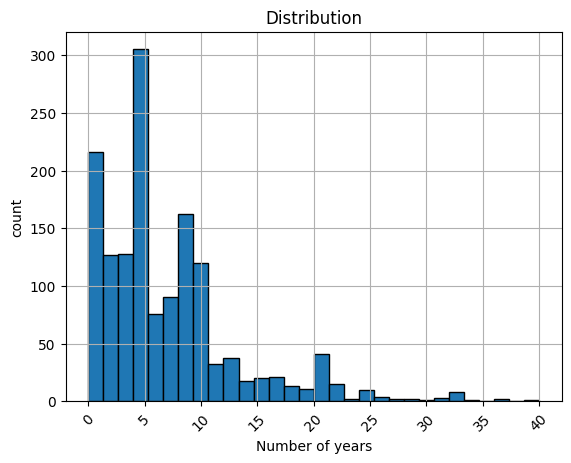

In [148]:
ax = df['YearsAtCompany'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution')
ax.set_xlabel('Number of years')
ax.set_ylabel('count')

- The max people stayed is 5 yers
- 10 to 22 (aprx) , there is conistency in people statyed
- 2 to 3 years , there is equalent num of people stayed
- after 25 yers , growth went down

In [149]:
#First get the num columns
num_cols = df.select_dtypes('object').columns
num_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [150]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1042
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

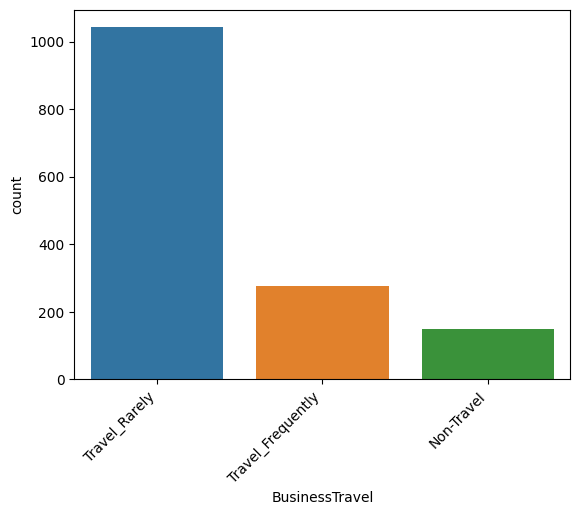

In [151]:
# Seaborn countplot
ax = sns.countplot(data=df, x="BusinessTravel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- In BusinessTravel category , rare travels are higher than frequent & non Travlers.
- Non travel size is just half of the travel frquent group
- Travel Rare group are way higher than Travel Frequently or Non Travel group
- Lowest Travel group is Non-Travel group

. Two different types of multivariate exploratory visualizations.  Each visualization must include a brief interpretation within the code file.

In [152]:
df[num_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

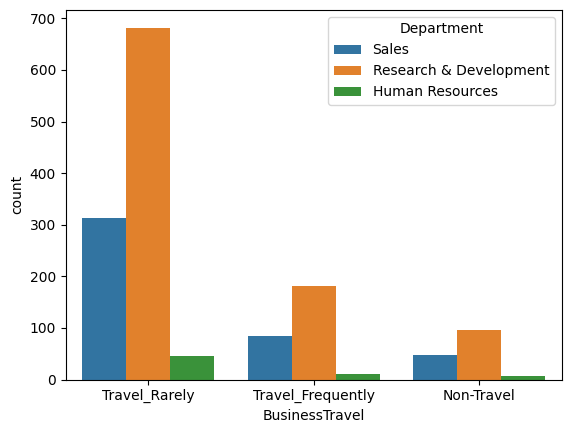

In [153]:
# Multivariate countplot with a hue argument
ax = sns.countplot(data=df, x='BusinessTravel', hue='Department')

- Research & Development department Travels Rarely
- Sales Department travles more frequently than Human Resource Department
-very low percentage of Human Resources departments are non Travlers
-Higest Frequent Travelers are Business Travel department
-Human Resource department Travel Frequent group , non travel numbers alsmost same

[Text(0.5, 1.0, 'Correlation Heatmap')]

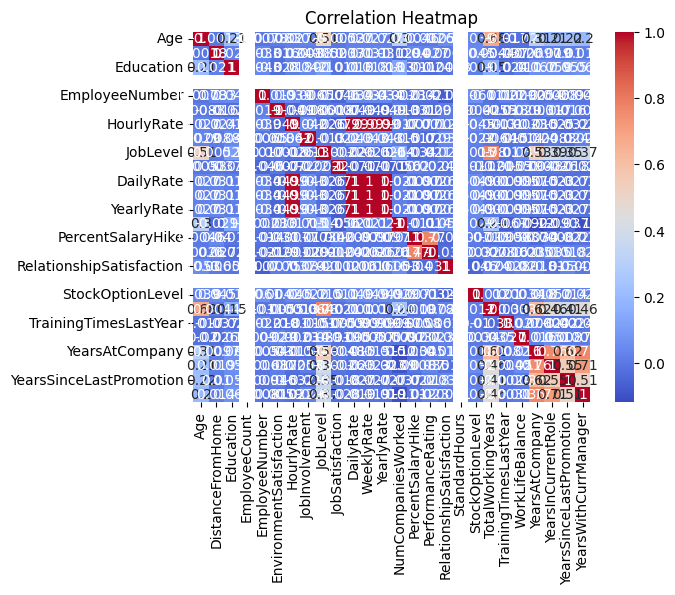

In [154]:
# create correlation heat map
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm');
ax.set(title='Correlation Heatmap')

- The YearsWithCurrManager column was most positively correlated with the Age column.